<a href="https://colab.research.google.com/github/AdarshKhatri01/Machine-Learning/blob/main/Matlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING REQUIRED LIBRARES**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization


import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
EPOCHS = 10
BATCH_SIZE = 64

In [3]:
# Loading the dataset
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(f"X_train.shape: {X_train.shape}\ny_train.shape: {y_train.shape}\nX_test.shape: {X_test.shape}\ny_test.shape: {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)
X_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000, 1)


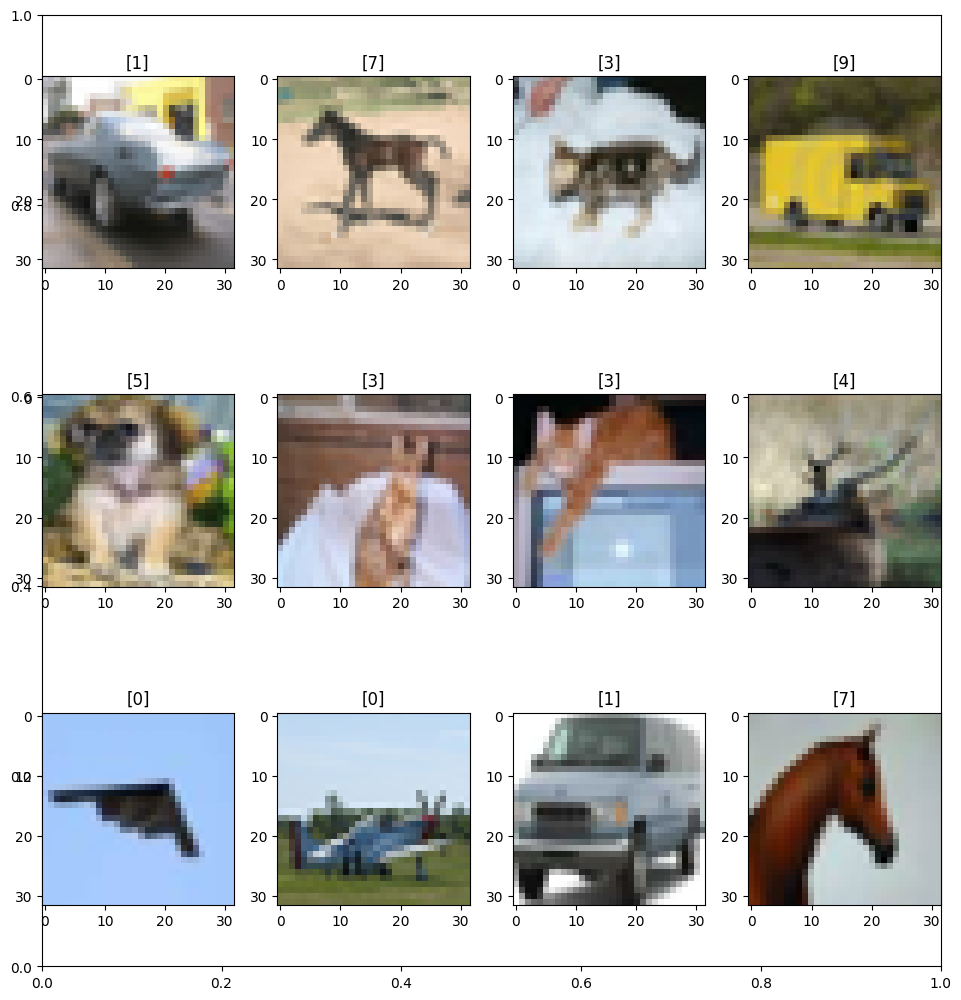

In [4]:
# Visualising the samples in the dataset
def show_samples(data, labels):
  plt.subplots(figsize=(10,10))
  for i in range(12):
    plt.subplot(3,4,i+1)
    k = np.random.randint(0, data.shape[0])
    plt.title(labels[k])
    plt.imshow(data[k])
  plt.tight_layout()
  plt.show()

show_samples(X_train, y_train)


In [5]:
# Dtat splitting and encoding

y_train = tf.one_hot(y_train, depth=y_train.max()+1, dtype=tf.float64)
y_test = tf.one_hot(y_test, depth=y_test.max()+1, dtype=tf.float64)

y_train = tf.squeeze(y_train)
y_test = tf.squeeze(y_test)

In [6]:
# Custom Model Creation

model = Sequential(name="Sequential_Layer")
model.add(Input(shape=(32,32,3), name="Input_Layer"))
model.add(Conv2D(16, (3,3), activation='relu', padding='same', name="Conv1"))
model.add(Conv2D(32, (3,3), activation='relu', padding='same', name="Conv2"))
model.add(MaxPooling2D(2,2, name="MaxPooling_Layer"))
model.add(Conv2D(64, (3,3), activation='relu', padding='same', name="Conv3"))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', name="Conv4"))


model.add(Flatten())

model.add(Dense(256, activation='relu', name="Dense1"))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu', name="Dense2"))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax', name="Dense3_Output"))


model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['AUC','accuracy'])

In [7]:
model.summary()

Model: "Sequential_Layer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling_Layer (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4 (Conv2D)                  │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense3_Output (Dense)           │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,556,714 (32.64 MB)

 Trainable params: 8,555,690 (32.64 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [8]:
training_history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - AUC: 0.8405 - accuracy: 0.4324 - loss: 1.6167 - val_AUC: 0.8931 - val_accuracy: 0.4982 - val_loss: 1.4499
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - AUC: 0.9535 - accuracy: 0.6836 - loss: 0.8997 - val_AUC: 0.9580 - val_accuracy: 0.7020 - val_loss: 0.8509
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - AUC: 0.9727 - accuracy: 0.7600 - loss: 0.6838 - val_AUC: 0.9511 - val_accuracy: 0.6904 - val_loss: 0.9503
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - AUC: 0.9848 - accuracy: 0.8239 - loss: 0.5033 - val_AUC: 0.9589 - val_accuracy: 0.7238 - val_loss: 0.8458
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - AUC: 0.9936 - accuracy: 0.8897 - loss: 0.3206 - val_AUC: 0.9562 - val_accuracy: 0.7315 - val_loss: 0.8968
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - AUC: 0.9980 - accuracy: 0.9394 - loss: 0.1782 - val_AUC: 0.9506 - val_accuracy: 0.7406 - val_loss: 0.9810
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━

In [9]:
[loss, auc, accuracy] = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test AUC: {auc}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9352 - accuracy: 0.7303 - loss: 1.3049
Test Loss: 1.3065129518508911
Test AUC: 0.93429034948349
Test Accuracy: 0.7296000123023987


# **TRANSFER LEARNING**

In [10]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

In [11]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False # Freeze Base Model

inputs = Input(shape=(32,32,3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)

outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['AUC','accuracy'])

In [13]:
pretained_training_history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - AUC: 0.6114 - accuracy: 0.1678 - loss: 2.2409 - val_AUC: 0.6688 - val_accuracy: 0.2111 - val_loss: 2.1618
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - AUC: 0.6695 - accuracy: 0.2082 - loss: 2.1575 - val_AUC: 0.6798 - val_accuracy: 0.2179 - val_loss: 2.1352
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - AUC: 0.6816 - accuracy: 0.2198 - loss: 2.1295 - val_AUC: 0.6831 - val_accuracy: 0.2244 - val_loss: 2.1232
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - AUC: 0.6867 - accuracy: 0.2249 - loss: 2.1158 - val_AUC: 0.6850 - val_accuracy: 0.2245 - val_loss: 2.1166
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - AUC: 0.6895 - accuracy: 0.2253 - loss: 2.1092 - val_AUC: 0.6866 - val_accuracy: 0.2254 - val_loss: 2.1129
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - AUC: 0.6910 - accuracy: 0.2313 - loss: 2.1039 - val_AUC: 0.6871 - val_accuracy: 0.2264 - val_loss: 2.1106
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━

In [14]:
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 16, 16,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 16, 16,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 16, 16,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 16, 16,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 16, 16,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 16, 16,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 17, 17,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 8, 8, 96)  │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │          0 │ block_1_depthwis… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 8, 8, 24)  │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [15]:
[loss, auc, accuracy] = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test AUC: {auc}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.6943 - accuracy: 0.2279 - loss: 2.0983
Test Loss: 2.0952672958374023
Test AUC: 0.6944966912269592
Test Accuracy: 0.23119999468326569
